# Рубежная контрольная работа

*Эту работу выполнять не обязательно. Баллы, набранные за эту контрольную работу просуммируются с баллами, которые будут набраны за контрольную работу 2 и будут выставлены как оценка за экзамен "автоматом". Если вы не выполните эту работу, переписать её будет невозможно, просто приходите на экзамен и добирайте баллы там.*

Сделайте копию ноутбука

Присвойте переменной `v` значение свой табельный номер ИСУ, это нужно для определения вашего варианта. Запустите код в следующей ячейке.

In [ ]:
from datetime import datetime
current_datetime = datetime.now()
print(current_datetime)
v = 333413 # по умолчанию вписан мой номер

2023-10-27 07:08:42.712529


## Описание метрического алгоритма

Пусть задана обучающая выборка пар "объект-ответ" $X^m = \{(x_1,y_1),\dots,(x_m,y_m)\}.$

Пусть на множестве объектов задана функция расстояния $\rho(x,x')$. Чем больше значение этой функции, тем менее схожими являются два объекта $x, x'$.
В простейшем случае используется евклидова метрика: $\rho(x,x') = \sqrt {\sum _{i=1}^{n}(x_{i}-x'_{i})^{2}}$,

Для произвольного объекта $u$ расположим объекты обучающей выборки $x_i$ в порядке возрастания расстояний до $u$:

$$\rho(u,x_{1; u}) \leq  \rho(u,x_{2; u}) \leq \cdots \leq \rho(u,x_{m; u}),$$
где через $x_{i; u}$ обозначается тот объект обучающей выборки, который является $i$-м соседом объекта $u$. Аналогичное обозначение введём и для ответа на $i$-м соседе: $y_{i; u}$. Таким образом, произвольный объект $u$ порождает свою перенумерацию выборки. В наиболее общем виде алгоритм ближайших соседей есть:
$$a(u) = \mathrm{arg}\max_{y\in Y} \sum_{i=1}^m \bigl[ y_{i; u}=y \bigr] w(i,u),$$
где $w(i,u)$ - заданная весовая функция, которая оценивает степень важности $i$-го соседа для классификации объекта $u$. Естественно полагать, что эта функция не отрицательна и не возрастает по $i$ (поскольку чем дальше объект, тем меньший вклад он должен вносить в пользу своего класса).

По-разному задавая весовую функцию, можно получать различные варианты метода ближайших соседей.

$w(i,u) = [i=1]$ - простейший метод ближайшего соседа;

$w(i,u) = [i\leq k]$ - метод $k$ ближайших соседей;

$w(i,u) = [i\leq k] q^i$ - метод $k$ экспоненциально взвешенных ближайших соседей, где предполагается константа $q < 1$




**Использование ядер сглаживания**

Для избежания неоднозначности ответа при классификации в качестве весовой функции $w(i, u)$ используют функцию ядра $K(r)$

Примеры ядер:

Triangular: ${\displaystyle K(r)=(1-|r|)}$,

Parabolic: ${\displaystyle K(r)={\frac {3}{4}}(1-r^{2})}$,

Tricube: ${\displaystyle K(r)={\frac {70}{81}}(1-{\left|r\right|}^{3})^{3}}$.

**Метод парзеновского окна**

Алгоритм $k$ ближайших соседей можно обобщить с помощью функции ядра. Рассмотрим два способа, которыми это можно сделать.

Метод парзеновского окна фиксированной ширины  $h$:
$$w(i,u) = K\biggl(\frac{\rho(u,x_{i; u})}{h}\biggr)$$

Метод парзеновского окна переменной ширины:
$$w(i,u) = K\biggl(\frac{\rho(u,x_{i; u})}{\rho(u,x_{k+1; u})}\biggr)$$

Таким образом классификаторы, полученные при использовании этих методов, можно записать в следующем виде

Фиксированной ширины: $$a_h = a(u, X^m, \boldsymbol{h}, K) = \mathrm{arg}\max_{y\in Y} \sum_{i=1}^m \bigl[ y_{i; u}=y \bigr] K\biggl(\frac{\rho(u,x_{i; u})}{h}\biggr)$$

Переменной ширины (фиксированное число соседей):
$$a_k = a(u, X^m, \boldsymbol{k}, K) = \mathrm{arg}\max_{y\in Y} \sum_{i=1}^m \bigl[ y_{i; u}=y \bigr] K\biggl(\frac{\rho(u,x_{i; u})}{\rho(u,x_{k+1; u})}\biggr)$$


# Задание 1 (7 баллов)

В задании требуется написать свою реализацию метрического алгоритма.

В качестве расстояния между объектами в этом задании используйте евклидово расстояние.

В качестве функции ядра используйте Triangular.

Для выбора варианта, запустите код в следующей ячейке



In [ ]:
if (int(str(v)[5]) % 2) == 0:
  print ('1.1 В алгоритме число соседей должно быть фиксированным. Настроить гиперпараметр k, для оценки качества использовать ROC-AUC')
else:
  print ('1.1 В алгоритме число соседей не должно быть фиксированным. Настроить гиперпараметр h (ширина окна), для оценки качества использовать использовать F1-меру')

if (int(str(v)[5]) % 2) == 0:
  print ('1.2 Построить график зависимости метрики качества на обучающей выборке от k')
else:
  print ('1.2 Построить график зависимости метрики качества на контрольной выборке от h')

1.1 В алгоритме число соседей не должно быть фиксированным. Настроить гиперпараметр h (ширина окна), для оценки качества использовать использовать F1-меру
1.2 Построить график зависимости метрики качества на контрольной выборке от h


Протестирйуте эту реализацию на наборе данных breast_cancer:

https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_breast_cancer.html

In [ ]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
data = load_breast_cancer()
df = pd.DataFrame(data.data, columns=data.feature_names)
df

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [ ]:
# PUT YOUR CODE HERE

X = data.data
y = data.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

def triangular_kernel(r):
    return np.maximum(0, 1 - np.abs(r))

def metric_algorithm(X_train, y_train, X_test, h):
    y_pred = []
    for x in X_test:
        distances = np.linalg.norm(X_train - x, axis=1) #евклидово расстояние
        weights = triangular_kernel(distances / h)
        class_counts = np.bincount(y_train, weights=weights)
        y_pred.append(np.argmax(class_counts))
    return np.array(y_pred)

def calculate_f1_score(y_true, y_pred): #смотрим F1 меру
    return f1_score(y_true, y_pred)

def evaluate_algorithm(X_train, y_train, X_test, y_test, h_values):
    f1_scores = []
    for h in h_values: #настраиваем гиперпараметр
        y_pred = metric_algorithm(X_train, y_train, X_test, h)
        f1_scores.append(calculate_f1_score(y_test, y_pred))
    return f1_scores

def plot_f1_vs_h(h_values, f1_scores):
    plt.plot(h_values, f1_scores)
    plt.xlabel('h')
    plt.ylabel('F1 score')
    plt.title('F1 score vs h')
    plt.grid()
    plt.show()

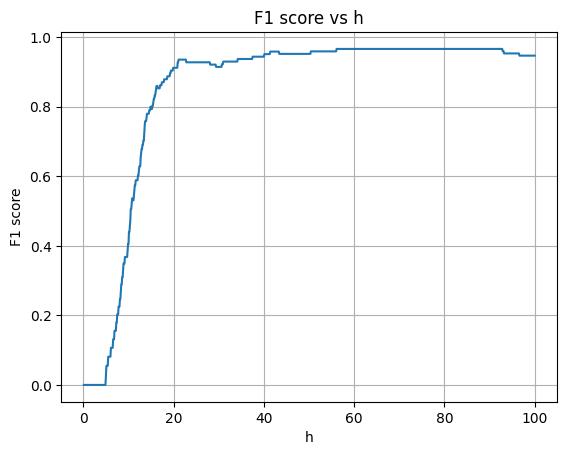

-----------------------------------
Best h: 56.1
Best F1 score: 0.9659863945578232
-----------------------------------


In [ ]:
# В диапазоне до 100
h_values = np.linspace(0.1, 100, 1000)
f1_scores = evaluate_algorithm(X_train, y_train, X_test, y_test, h_values)
plot_f1_vs_h(h_values, f1_scores)

best_h = h_values[np.argmax(f1_scores)]
best_f1 = np.max(f1_scores)


print("-----------------------------------")
print("Best h:", best_h)
print("Best F1 score:", best_f1)
print("-----------------------------------")

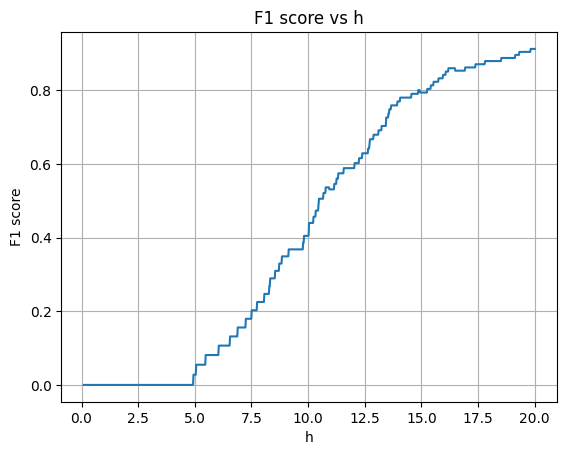

-----------------------------------
Best h: 19.820720720720722
Best F1 score: 0.9117647058823529
-----------------------------------


In [ ]:
# В диапазоне  до 20
h_values = np.linspace(0.1, 20, 1000)
f1_scores = evaluate_algorithm(X_train, y_train, X_test, y_test, h_values)
plot_f1_vs_h(h_values, f1_scores)

best_h = h_values[np.argmax(f1_scores)]
best_f1 = np.max(f1_scores)

print("-----------------------------------")
print("Best h:", best_h)
print("Best F1 score:", best_f1)
print("-----------------------------------")

Может потребоваться предобработка данных

Штрафы:
* отсутствие реализации алгоритма (4 балла)
* ошибки в реализации алгоритма (2 балла)
* отсутствие настройки гиперпараметра (2 балла)
* ошибки в настройке гиперпараметра (1 балл)
* отсутствие графика (1 балл)

# Задание 2 (4 балла)

Требуется реализовать метрический алгоритм для предсказания действительного числа (то есть как в задаче регрессии, а не как в задаче классификации).

В задании 2 не используйте ядра и метод парзеновского окна.

Во этом задании в качестве исходных данных используется словарь кинокритиков и выставленных ими оценок

In [ ]:
critics={'Lisa Rose': {'Lady in the Water': 2.5, 'Snakes on a Plane': 3.5,
 'Just My Luck': 3.0, 'Superman Returns': 3.5, 'You, Me and Dupree': 2.5,
 'The Night Listener': 3.0},
'Gene Seymour': {'Lady in the Water': 3.0, 'Snakes on a Plane': 3.5,
 'Just My Luck': 1.5, 'Superman Returns': 5.0, 'The Night Listener': 3.0,
 'You, Me and Dupree': 3.5},
'Michael Phillips': {'Lady in the Water': 2.5, 'Snakes on a Plane': 3.0,
 'Superman Returns': 3.5, 'The Night Listener': 4.0},
'Claudia Puig': {'Snakes on a Plane': 3.5, 'Just My Luck': 3.0,
 'The Night Listener': 4.5, 'Superman Returns': 4.0,
 'You, Me and Dupree': 2.5},
'Mick LaSalle': {'Lady in the Water': 3.0, 'Snakes on a Plane': 4.0,
 'Just My Luck': 2.0, 'Superman Returns': 3.0, 'The Night Listener': 3.0,
 'You, Me and Dupree': 2.0},
'Jack Matthews': {'Lady in the Water': 3.0, 'Snakes on a Plane': 4.0,
 'The Night Listener': 3.0, 'Superman Returns': 5.0, 'You, Me and Dupree': 3.5},
'Toby': {'Snakes on a Plane':4.5,'You, Me and Dupree':1.0,'Superman Returns':4.0}}

In [ ]:
import pandas as pd

df = pd.DataFrame()
movies = set()
for critic in critics:
    movies.update(critics[critic].keys())

for critic in critics:
    ratings = critics[critic]
    critic_ratings = []
    for movie in movies:
        if movie in ratings:
            critic_ratings.append(ratings[movie])
        else:
            critic_ratings.append(0)
    df[critic] = critic_ratings

df.index = list(movies)
df

,Lisa Rose,Gene Seymour,Michael Phillips,Claudia Puig,Mick LaSalle,Jack Matthews,Toby
The Night Listener,3.0,3.0,4.0,4.5,3.0,3.0,0.0
Snakes on a Plane,3.5,3.5,3.0,3.5,4.0,4.0,4.5
"You, Me and Dupree",2.5,3.5,0.0,2.5,2.0,3.5,1.0
Superman Returns,3.5,5.0,3.5,4.0,3.0,5.0,4.0
Lady in the Water,2.5,3.0,2.5,0.0,3.0,3.0,0.0
Just My Luck,3.0,1.5,0.0,3.0,2.0,0.0,0.0


In [ ]:
df = df.transpose()
df

,The Night Listener,Snakes on a Plane,"You, Me and Dupree",Superman Returns,Lady in the Water,Just My Luck
Lisa Rose,3.0,3.5,2.5,3.5,2.5,3.0
Gene Seymour,3.0,3.5,3.5,5.0,3.0,1.5
Michael Phillips,4.0,3.0,0.0,3.5,2.5,0.0
Claudia Puig,4.5,3.5,2.5,4.0,0.0,3.0
Mick LaSalle,3.0,4.0,2.0,3.0,3.0,2.0
Jack Matthews,3.0,4.0,3.5,5.0,3.0,0.0
Toby,0.0,4.5,1.0,4.0,0.0,0.0


По этому словарю нужно сделать Dataframe в pandas. Строки - это критики, столбцы - названия фильмов. На пересечении поставленные оценки. При отсуствии оценки у критика за фильм в датафрейме нужно поставить 0.

Для выбора варианта, запустите код в следующей ячейке

In [ ]:
if (int(str(v)[4]) % 2) == 0:
  print ('2.1 Сделайте предсказание оценок для критика Toby по фильмам, которые он ещё не видел')
else:
  print ('2.1 Сделайте предсказание оценок для фильма You, Me and Dupree по критикам, которые его ещё не видели')
print ('2.2 Объясните как оценить качество полученного предказания')

2.1 Сделайте предсказание оценок для фильма You, Me and Dupree по критикам, которые его ещё не видели
2.2 Объясните как оценить качество полученного предказания


In [ ]:
def euclidean_distance(x1, x2):
    return np.sqrt(np.sum((x1 - x2) ** 2))

def knn_predict(df, movie_ratings, k):
    distances = []
    for i in range(len(df)):
        critic_ratings = df.iloc[i].values
        distance = euclidean_distance(critic_ratings, movie_ratings)
        distances.append((distance, i))
    distances.sort()

    total_rating = 0
    for i in range(k):
        index = distances[i][1]
        rating = df.iloc[index]['You, Me and Dupree']
        total_rating += rating

    return total_rating / k

In [ ]:
movie_ratings = df['You, Me and Dupree'].tolist()
movie_ratings = [x for x in movie_ratings if x != 0]

k = 3
prediction = knn_predict(df, movie_ratings, k)


print("-----------------------------------")
print("Предсказанная оценка для фильма You, Me and Dupree:", prediction)
print("-----------------------------------")

-----------------------------------
Предсказанная оценка для фильма You, Me and Dupree: 2.6666666666666665
-----------------------------------


In [ ]:
actual_ratings = df['You, Me and Dupree'].tolist()
actual_ratings = [x for x in actual_ratings if x != 0]
predicted_ratings = [knn_predict(df, movie_ratings, k)] * len(actual_ratings)

mae = np.mean(np.abs(np.array(actual_ratings) - np.array(predicted_ratings)))
mse = np.mean((np.array(actual_ratings) - np.array(predicted_ratings)) ** 2)


print("-----------------------------------")
print("MAE:", mae)
print("MSE:", mse)
print("-----------------------------------")

-----------------------------------
MAE: 0.7222222222222222
MSE: 0.7777777777777777
-----------------------------------


    На основе данных MAE и MSE можно сделать вывод, что алгоритм имеет среднюю точность предсказания. MAE равна 0.722, а MSE равна 0.778. Чем меньше значения MAE и MSE, тем лучше качество алгоритма.

Штрафы:
* отсутствие реализации алгоритма (2 балла)
* ошибки в реализации алгоритма (1 балл)
* отсутствие тестирования алгоритма (1 балл)
* отсутствие объяснения оценки качества алгоритма (1 балл)

После завершения контрольной работы, дайте ссылку на ноутбук в отдельном followup discussion в своей теме на Piazza. Дайте разрешение на его просмотр.

Не забудьте запустить код в последней ячейке для контроля времени выполнения.

In [ ]:
current_datetime = datetime.now()
print(current_datetime)

2023-10-27 08:27:49.607588
